# Import Library

In [1]:
# import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

# Import XGBoost
import xgboost as xgb

# Data Preprocessing

## Load the data

In [2]:
# Load the dataset
file_path = 'Kelulusan Train.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [3]:
# Summary statistics
data.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [4]:
# Delete columns NAMA, UMUR, IPS 6, IPS 7, IPS 8, IPK
data = data.drop(['NAMA', 'UMUR', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK '], axis=1)
print(data.columns)
data.head()

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'IPS 1', 'IPS 2',
       'IPS 3', 'IPS 4', 'IPS 5', 'STATUS KELULUSAN'],
      dtype='object')


,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,TERLAMBAT
1,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,TERLAMBAT
2,PEREMPUAN,BEKERJA,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,TERLAMBAT
3,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,TERLAMBAT
4,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,TERLAMBAT


In [5]:
# check missing value
data.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
STATUS KELULUSAN    0
dtype: int64

In [6]:
# Check and remove duplicates
print("Jumlah data duplikat:", data.duplicated().sum())

if data.duplicated().sum() > 0:
    print("\nData duplikat:")
    print(data[data.duplicated()])
    
    # Hapus data duplikat
    data = data.drop_duplicates()
    print("\nSetelah penghapusan, jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 1

Data duplikat:
    JENIS KELAMIN STATUS MAHASISWA   STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  \
335   LAKI - LAKI        MAHASISWA  BELUM MENIKAH   2.57   3.02   3.13   3.25   

     IPS 5 STATUS KELULUSAN  
335   3.29            TEPAT  

Setelah penghapusan, jumlah data duplikat: 0


In [7]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JENIS KELAMIN     378 non-null    object 
 1   STATUS MAHASISWA  378 non-null    object 
 2   STATUS NIKAH      378 non-null    object 
 3   IPS 1             378 non-null    float64
 4   IPS 2             378 non-null    float64
 5   IPS 3             378 non-null    float64
 6   IPS 4             378 non-null    float64
 7   IPS 5             378 non-null    float64
 8   STATUS KELULUSAN  378 non-null    object 
dtypes: float64(5), object(4)
memory usage: 29.5+ KB


# Data Exploration

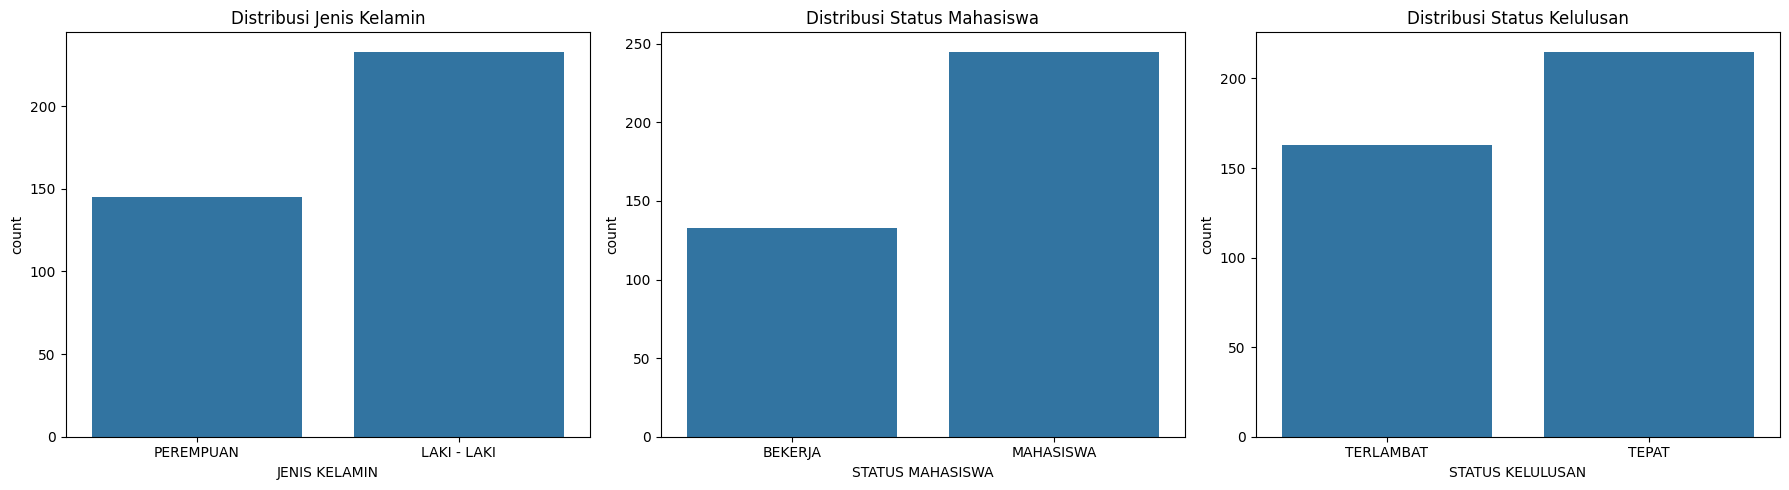

In [8]:
# Distribution of categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='JENIS KELAMIN', data=data, ax=axes[0])
axes[0].set_title('Distribusi Jenis Kelamin')

sns.countplot(x='STATUS MAHASISWA', data=data, ax=axes[1])
axes[1].set_title('Distribusi Status Mahasiswa')

sns.countplot(x='STATUS KELULUSAN', data=data, ax=axes[2])
axes[2].set_title('Distribusi Status Kelulusan')

plt.tight_layout()
plt.show()

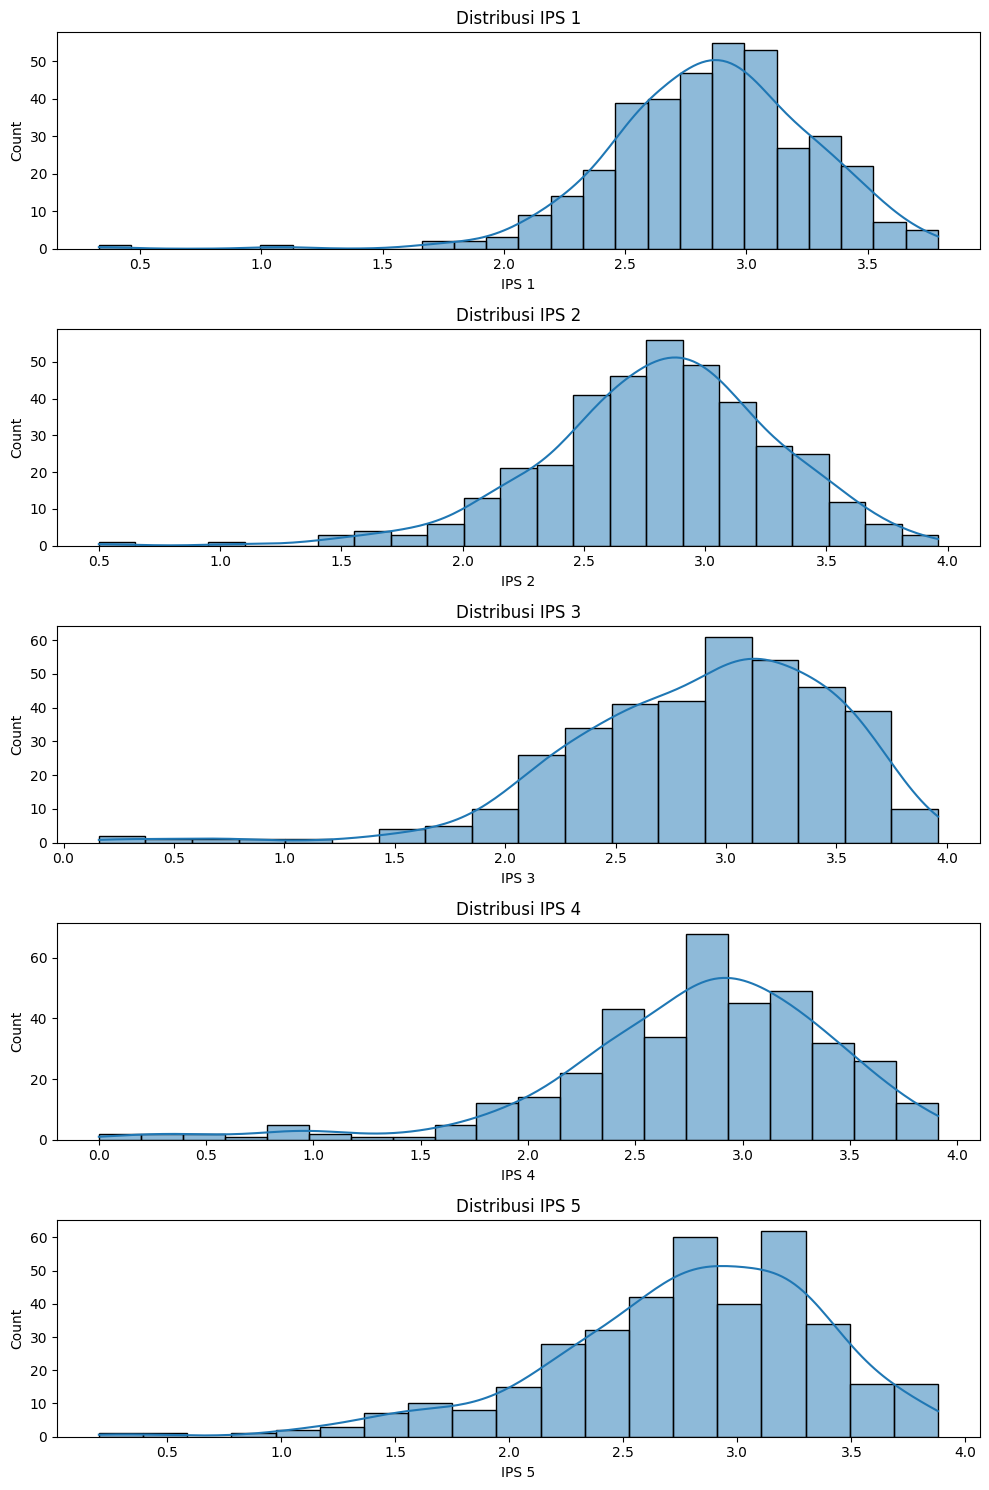

In [9]:
# Distribution of IPS scores
ips_columns = ['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5']

fig, axes = plt.subplots(len(ips_columns), 1, figsize=(10, 15))

for i, col in enumerate(ips_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

# Label Encoding

In [10]:
# Label Encoding for categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
    # Cetak nilai mappings untuk referensi
    print(f"Encoding for {column}:")
    for i, class_name in enumerate(le.classes_):
        print(f"  {class_name} -> {i}")
    print()

# Tampilkan data setelah encoding
data.head()

Encoding for JENIS KELAMIN:
  LAKI - LAKI -> 0
  PEREMPUAN -> 1

Encoding for STATUS MAHASISWA:
  BEKERJA -> 0
  MAHASISWA -> 1

Encoding for STATUS NIKAH:
  BELUM MENIKAH -> 0
  MENIKAH -> 1

Encoding for STATUS KELULUSAN:
  TEPAT -> 0
  TERLAMBAT -> 1



,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
0,1,0,0,2.76,2.80,3.20,3.17,2.98,1
1,1,1,0,3.00,3.30,3.14,3.14,2.84,1
2,1,0,0,3.50,3.30,3.70,3.29,3.53,1
3,1,1,0,3.17,3.41,3.61,3.36,3.48,1
4,1,0,0,2.90,2.89,3.30,2.85,2.98,1


# Create Machine Learning Model with XGBoost

## Split the data

In [11]:
# Define features (X) and target (y)
input_features = ['JENIS KELAMIN',
                  'STATUS MAHASISWA',
                  'STATUS NIKAH',
                  'IPS 1',
                  'IPS 2',
                  'IPS 3',
                  'IPS 4',
                  'IPS 5']
X = data[input_features]
y = data['STATUS KELULUSAN']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Target distribution in train and test sets
print("\nDistribusi nilai target pada data training:")
print(y_train.value_counts())

print("\nDistribusi nilai target pada data testing:")
print(y_test.value_counts())

X_train shape: (302, 8)
X_test shape: (76, 8)
y_train shape: (302,)
y_test shape: (76,)

Distribusi nilai target pada data training:
STATUS KELULUSAN
0    180
1    122
Name: count, dtype: int64

Distribusi nilai target pada data testing:
STATUS KELULUSAN
1    41
0    35
Name: count, dtype: int64


# XGBoost Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}


# Train XGBoost Model with Best Parameters

In [13]:
# Train the XGBoost model with the best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with XGBoost: {accuracy:.4f}')

Model Accuracy with XGBoost: 0.8684


# Evaluate Model Performance

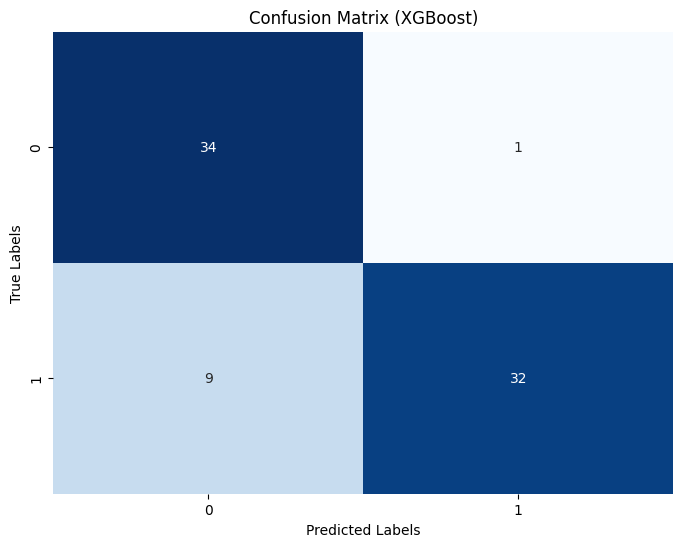

In [14]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

            Feature  Importance
1  STATUS MAHASISWA    0.729443
7             IPS 5    0.066334
6             IPS 4    0.061097
3             IPS 1    0.051344
5             IPS 3    0.046974
4             IPS 2    0.027513
0     JENIS KELAMIN    0.017296
2      STATUS NIKAH    0.000000


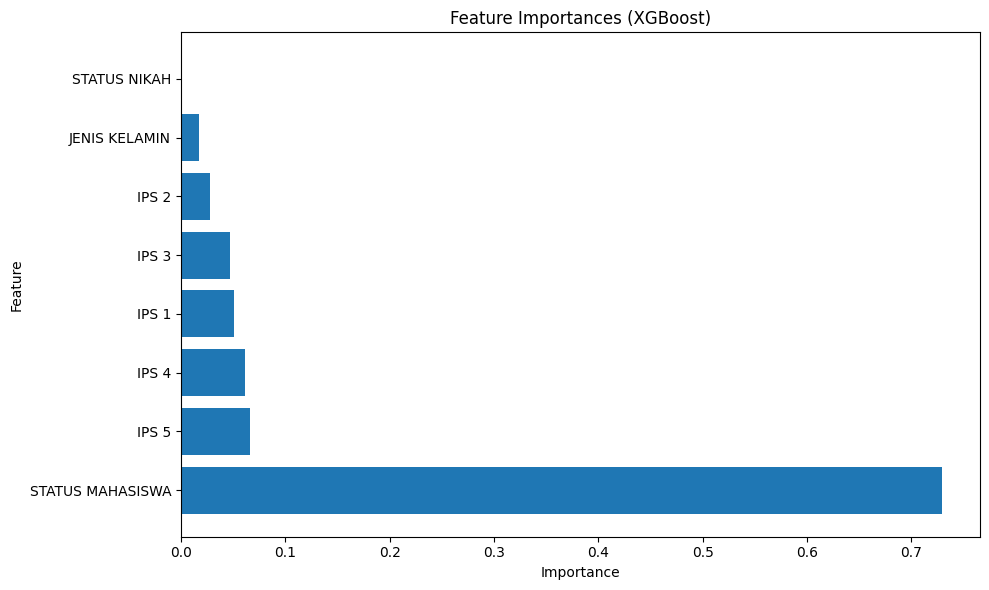

In [15]:
# Calculate feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

In [16]:
# Prediksi probabilitas
y_proba = xgb_model.predict_proba(X_test)

# Tampilkan beberapa contoh hasil prediksi dengan probabilitasnya
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability Class 0': [p[0] for p in y_proba],
    'Probability Class 1': [p[1] for p in y_proba]
})

print(result_df.head(10))

     Actual  Predicted  Probability Class 0  Probability Class 1
287       0          0             0.990083             0.009917
329       1          0             0.551412             0.448588
323       0          0             0.986567             0.013433
145       0          0             0.983112             0.016888
55        1          1             0.050810             0.949190
93        0          0             0.964549             0.035451
341       0          0             0.973325             0.026675
82        1          0             0.738542             0.261458
366       0          0             0.936606             0.063394
148       1          1             0.011174             0.988826


In [17]:
# Count correct predictions
correct_predictions = (result_df['Actual'] == result_df['Predicted']).sum()
print(f"Number of correct predictions: {correct_predictions} out of {len(y_test)}")

Number of correct predictions: 66 out of 76


In [18]:
# Save the trained model to a file
filename = 'trained_model_xgboost.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))
print(f"Model saved as {filename}")

Model saved as trained_model_xgboost.pkl
